<a href="https://colab.research.google.com/github/leadeeerq/Projects/blob/main/Finance_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
!pip install Quandl

In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import quandl
from bs4 import BeautifulSoup as bs
import requests
import pickle
import os
import numpy as np
from collections import Counter
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

#Loading the data

In [ ]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

## With DataReader

In [ ]:
# df = web.DataReader('TSLA', 'stooq', start, end) # ticker

## With Quandl

In [ ]:
api_key = 'ECdRivNZnULS4p6eKnYx'

In [ ]:
# df = quandl.get('WIKI/TSLA', start_date=start, end_date=end)

In [ ]:
# df.head()

##Data to CSV

In [ ]:
# df.to_csv('/content/drive/MyDrive/Projekty/Finance Data Analysis/tsla.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projekty/Finance Data Analysis/tsla.csv', parse_dates = True, index_col = 0)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,222.87,223.2500,213.2600,219.310,4764443.0,0.0,1.0,222.87,223.2500,213.2600,219.310,4764443.0
2015-01-05,214.55,216.5000,207.1626,210.090,5368477.0,0.0,1.0,214.55,216.5000,207.1626,210.090,5368477.0
2015-01-06,210.06,214.2000,204.2100,211.280,6261936.0,0.0,1.0,210.06,214.2000,204.2100,211.280,6261936.0
2015-01-07,213.35,214.7800,209.7800,210.950,2968390.0,0.0,1.0,213.35,214.7800,209.7800,210.950,2968390.0
2015-01-08,212.81,213.7999,210.0100,210.615,3442509.0,0.0,1.0,212.81,213.7999,210.0100,210.615,3442509.0


#Plotting the data

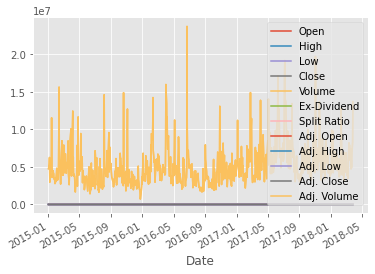

In [ ]:
df.plot()

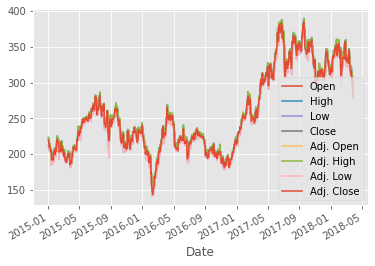

In [ ]:
df1 = df.drop(['Volume', 'Adj. Volume', 'Split Ratio', 'Ex-Dividend'], axis = 1)
df1.plot()

#Data manipulation and visualization

##100 days moving average

In [ ]:
# Min_periods = 0, when the number of the following days is smaller than the window, take the mean value of the available days
df['100MA'] = df['Adj. Close'].rolling(window = 100, min_periods = 0).mean()
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,100MA
Date,,,,,,,,,,,,,
2015-01-02,222.87,223.2500,213.2600,219.310,4764443.0,0.0,1.0,222.87,223.2500,213.2600,219.310,4764443.0,219.3100
2015-01-05,214.55,216.5000,207.1626,210.090,5368477.0,0.0,1.0,214.55,216.5000,207.1626,210.090,5368477.0,214.7000
2015-01-06,210.06,214.2000,204.2100,211.280,6261936.0,0.0,1.0,210.06,214.2000,204.2100,211.280,6261936.0,213.5600
2015-01-07,213.35,214.7800,209.7800,210.950,2968390.0,0.0,1.0,213.35,214.7800,209.7800,210.950,2968390.0,212.9075
2015-01-08,212.81,213.7999,210.0100,210.615,3442509.0,0.0,1.0,212.81,213.7999,210.0100,210.615,3442509.0,212.4490


##Adj. Close visualization

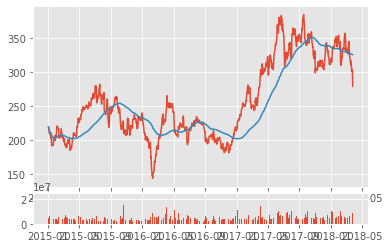

In [ ]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(df.index, df['Adj. Close'])
ax1.plot(df.index, df['100MA'])
ax2.bar(df.index, df['Volume'])

plt.show()

#Resampling data - from 1 to 10 days

##Open high low close

In [ ]:
df_ohlc = df['Adj. Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [ ]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2015-01-02,219.31,219.31,206.66,206.66
2015-01-12,202.21,204.25,191.87,196.57
2015-01-22,201.62,206.55,199.37,203.60
2015-02-01,210.94,220.99,210.94,216.29
2015-02-11,212.80,217.11,202.88,217.11


In [ ]:
df_ohlc.reset_index(inplace = True)

##Converting the date to matplotlib format

In [ ]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [ ]:
df_ohlc.head()

,Date,open,high,low,close
0,735600.0,219.31,219.31,206.66,206.66
1,735610.0,202.21,204.25,191.87,196.57
2,735620.0,201.62,206.55,199.37,203.60
3,735630.0,210.94,220.99,210.94,216.29
4,735640.0,212.80,217.11,202.88,217.11


##Plotting the result

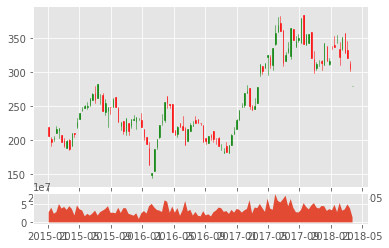

In [ ]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

_ = plt.show()

#Webscraping for S&P500 tickers

In [ ]:
def sp500_tickers():
  r = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  soup = bs(r.content)
  table = soup.find('table', {'class': 'wikitable sortable'})
  tickers = []
  for row in table.find_all('tr')[1:]:
    ticker = row.find_all('td')[0].text.replace('\n','')
    tickers.append(ticker)

  with open('/content/drive/MyDrive/Projekty/Finance Data Analysis/Tickers.pickle', 'wb') as f:
    pickle.dump(tickers, f)

  return tickers

In [ ]:
tickers = sp500_tickers()

#Webscraping for S&P500 data

In [ ]:
def get_data(reload_tickers = False):
  if reload_tickers:
    tickers = sp500_tickers()
  else:
    with open ('/content/drive/MyDrive/Projekty/Finance Data Analysis/Tickers.pickle', 'rb') as f:
      tickers = pickle.load(f)

  if not os.path.exists('/content/drive/MyDrive/Projekty/Finance Data Analysis/Stock_dataframes'):
    os.makedirs('/content/drive/MyDrive/Projekty/Finance Data Analysis/Stock_dataframes')

  start = dt.datetime(2010, 1, 1)
  # end = dt.datetime.now()
  end = dt.datetime(2023, 1, 17)

  for ticker in tickers:
    try:
      print(f'Getting data for ticker {ticker}')
      if not os.path.exists(f'/content/drive/MyDrive/Projekty/Finance Data Analysis/Stock_dataframes/{ticker}.csv'):
        df = quandl.get(f'WIKI/{ticker}', start_date=start, end_date=end, api_key = api_key)
      # df = web.DataReader('TSLA', 'stooq', start, end)
        df.to_csv(f'/content/drive/MyDrive/Projekty/Finance Data Analysis/Stock_dataframes/{ticker}.csv')
      else:
        print(f'The folder with {ticker} already exists.')
    except Exception as e:
      print('Something went wrong.')
      pass

In [ ]:
get_data(reload_tickers = True)

#Compiling the data

##Checking which tickers were downloaded successfully

In [ ]:
basepath = '/content/drive/MyDrive/Projekty/Finance Data Analysis/Stock_dataframes/'
downloaded_tickers = []
for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        # print(entry)
        entry = entry.split('.')[0]
        downloaded_tickers.append(entry)

In [ ]:
downloaded_tickers

In [ ]:
def compile_data():
  # with open('/content/drive/MyDrive/Projekty/Finance Data Analysis/Tickers.pickle', 'rb') as f:
  #   tickers = pickle.load(f)
  tickers = downloaded_tickers

  df_combined = pd.DataFrame()

  for count, ticker in enumerate(tickers):
    df = pd.read_csv(f'/content/drive/MyDrive/Projekty/Finance Data Analysis/Stock_dataframes/{ticker}.csv')
    df.set_index('Date', inplace = True)
    df.rename(columns = {'Adj. Close': ticker}, inplace = True)
    df = df[[f'{ticker}']]

    if df_combined.empty:
      df_combined = df
    else:
      df_combined = df_combined.join(df, how = 'outer')

    if count % 20 == 0:
      print(count)

  df_combined.to_csv('/content/drive/MyDrive/Projekty/Finance Data Analysis/df_combined.csv')

  return df_combined

In [ ]:
compiled_data = compile_data()

In [ ]:
compiled_data.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,68.346207,10.107816,21.229632,NaN,35.484403,10.329469,25.909241,37.09,30.715153,39.554636,...,27.426634,84.228213,44.777075,15.679078,NaN,21.389761,28.67,56.958626,12.807981,NaN
2010-01-05,67.918117,9.978665,21.058111,NaN,35.703703,10.347752,26.049202,37.70,30.550211,39.319541,...,27.379639,84.262861,47.500384,15.493131,NaN,21.316612,28.62,58.761713,13.259575,NaN
2010-01-06,68.881320,9.983196,21.175058,NaN,36.083260,10.292905,25.983338,37.62,30.478497,39.662387,...,27.614617,84.583351,46.877313,15.522882,NaN,21.164220,28.40,58.742737,14.412582,NaN
2010-01-07,68.930715,10.012652,21.350477,NaN,36.049522,10.046095,25.711649,36.89,30.464154,39.652592,...,27.614617,85.380245,47.878427,15.455941,NaN,21.158125,27.69,60.090307,16.026791,NaN
2010-01-08,69.416432,10.159930,21.459627,NaN,35.906134,9.963824,25.390562,36.69,30.421125,39.809321,...,27.605218,86.385024,47.535388,15.463379,NaN,21.164220,27.60,58.828146,15.767365,NaN


#Data visualization

In [ ]:
def visualize_data():
  df = pd.read_csv('/content/drive/MyDrive/Projekty/Finance Data Analysis/df_combined.csv')
  df['ALGN'].plot()
  plt.show()

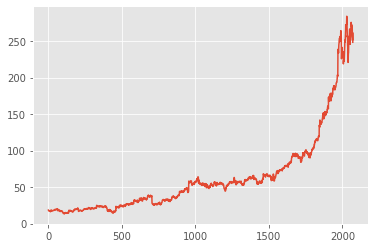

In [ ]:
visualize_data()

In [ ]:
def visualize_data():
  df = pd.read_csv('/content/drive/MyDrive/Projekty/Finance Data Analysis/df_combined.csv')
  df_corr = df.corr()
  print(df_corr.head())

  data = df_corr.values
  fig = plt.figure(figsize = (20,20))
  ax = fig.add_subplot(1, 1, 1)
  heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
  fig.colorbar(heatmap)
  ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False) #shift tick by 0,5 units
  ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
  ax.invert_yaxis()
  ax.xaxis.tick_top()

  column_labels = df_corr.columns
  row_labels = df_corr.index

  ax.set_xticklabels(column_labels)
  ax.set_yticklabels(row_labels)
  plt.xticks(rotation = 90)
  heatmap.set_clim(-1, 1) #color limit
  plt.tight_layout()
  plt.show()


           MMM       AOS       ABT      ABBV       ACN      ATVI       ADM  \
MMM   1.000000  0.975875  0.934046  0.931073  0.968303  0.934561  0.853163   
AOS   0.975875  1.000000  0.909823  0.885826  0.975514  0.970049  0.760828   
ABT   0.934046  0.909823  1.000000  0.951949  0.936021  0.860420  0.838745   
ABBV  0.931073  0.885826  0.951949  1.000000  0.911428  0.888955  0.508107   
ACN   0.968303  0.975514  0.936021  0.911428  1.000000  0.949343  0.759546   

          ADBE       ADP       AAP  ...       WTW       GWW      WYNN  \
MMM   0.973648  0.987292  0.767844  ... -0.555997  0.580384  0.335247   
AOS   0.971986  0.971246  0.656188  ... -0.378241  0.537797  0.296151   
ABT   0.908035  0.950889  0.716506  ... -0.363510  0.722710  0.480362   
ABBV  0.946633  0.899905  0.126280  ...  0.264878  0.004490  0.121550   
ACN   0.960440  0.980067  0.686461  ... -0.301433  0.639387  0.357061   

           XEL       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.968224 

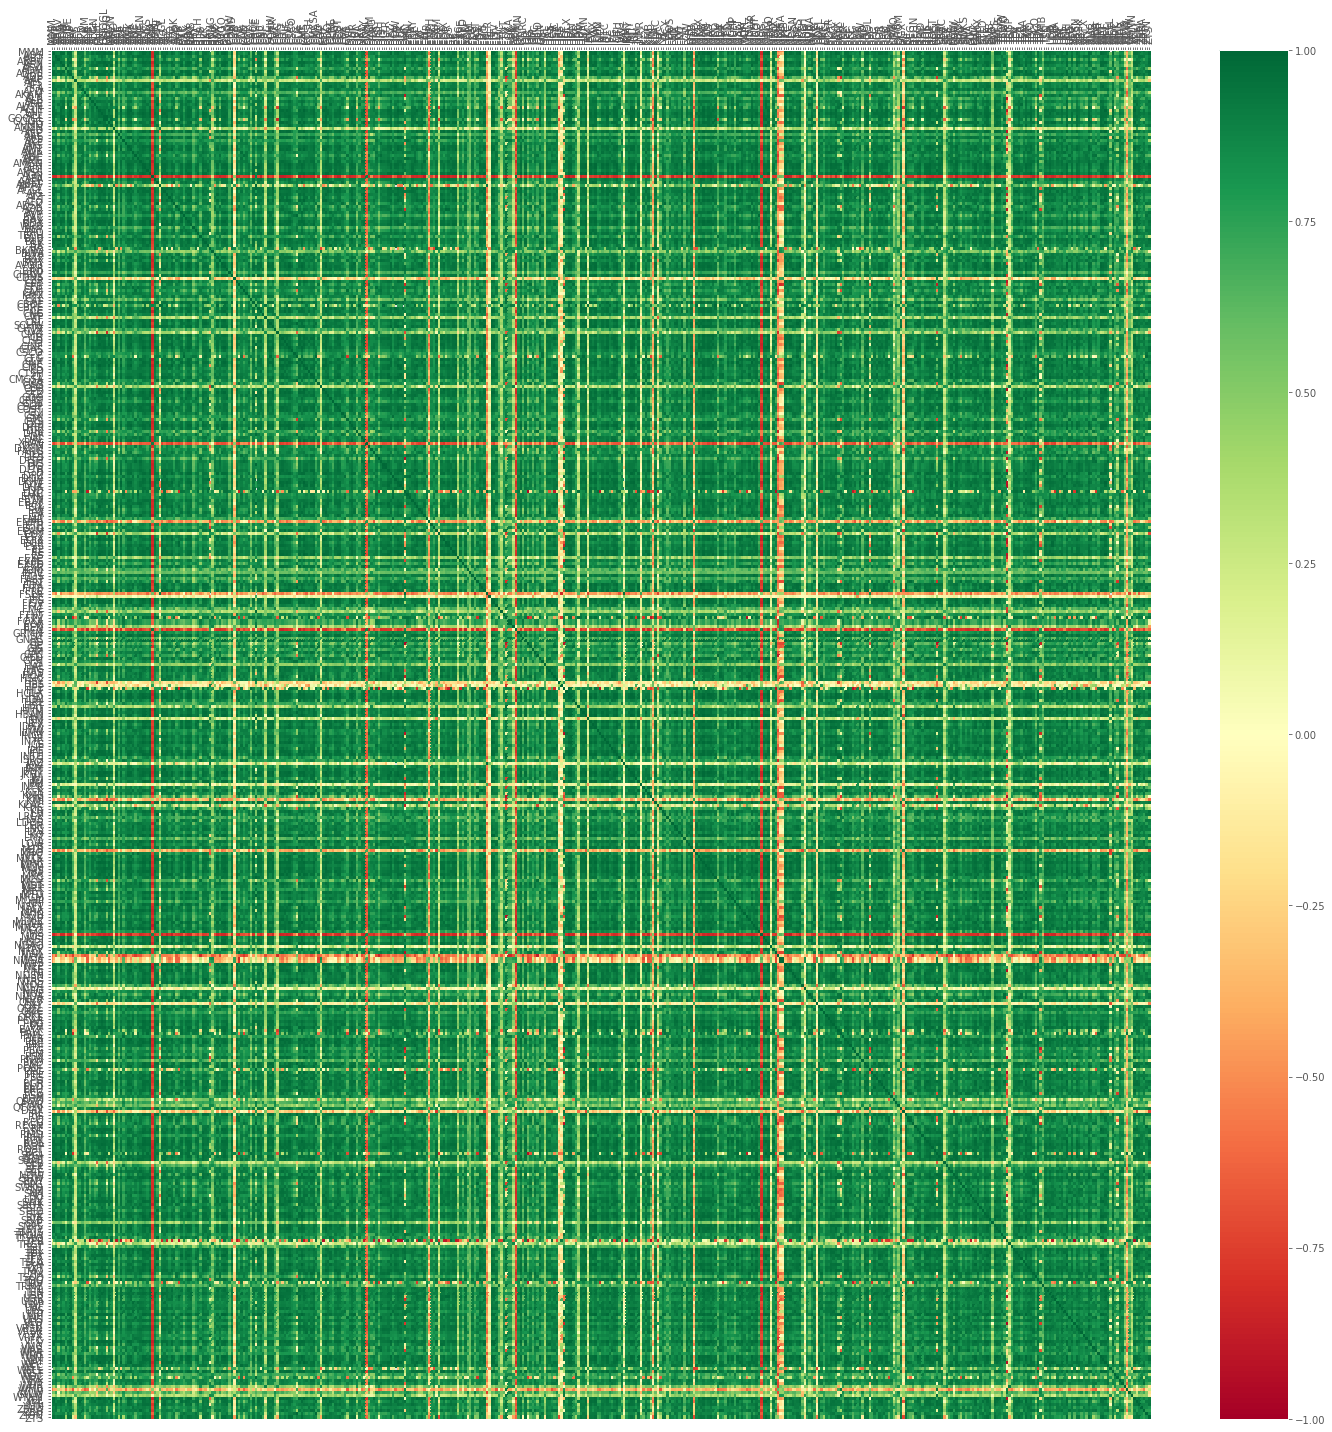

In [ ]:
visualize_data()

#Machine Learning for data analysis

In [ ]:
def process_data_for_labels(ticker):
  days = 7
  df = pd.read_csv('/content/drive/MyDrive/Projekty/Finance Data Analysis/df_combined.csv', index_col = 0)
  tickers = df.columns.values.tolist()
  df.fillna(0, inplace = True)

  for i in range(1, days + 1):
    df[f'{ticker}_{i}d'] = (df[ticker].shift(-i) - df[ticker])/df[ticker]
  
  df.fillna(0, inplace = True)
  return tickers, df

In [ ]:
process_data_for_labels('ALGN')

In [ ]:
def buy_sell_hold(*args):
  cols = [c for c in args]
  requirement = 0.02
  for col in cols:
    if col > requirement:
      return 1 # Buy
    if col < -requirement:
      return -1 # Sell
  return 0 # Hold

In [ ]:
def extract_featuresets(ticker):
  tickers, df = process_data_for_labels(ticker)
  df[f'{ticker}_target'] = list(map(buy_sell_hold,
                                    df[f'{ticker}_1d'],
                                    df[f'{ticker}_2d'],
                                    df[f'{ticker}_3d'],
                                    df[f'{ticker}_4d'],
                                    df[f'{ticker}_5d'],
                                    df[f'{ticker}_6d'],
                                    df[f'{ticker}_7d']))
  
  vals = df[f'{ticker}_target'].values.tolist()
  str_vals = [str(val) for val in vals]
  print('Data spread:', Counter(str_vals)) # Check occurencies of a particular value -1, 0, 1

  df.fillna(0, inplace = True)
  df = df.replace([np.inf, -np.inf], np.nan) # Replace infinite changes with NaN
  df.dropna(inplace = True)

  df_vals = df[[ticker for ticker in tickers]].pct_change() # Percentage change between the current and a prior element.
  df_vals = df_vals.replace([np.inf, -np.inf], 0) # Replace infinite changes with NaN
  df_vals.fillna(0, inplace = True)

  X, y = df_vals.values, df[f'{ticker}_target'].values

  return X, y, df

In [ ]:
X, y, df_algn = extract_featuresets('ALGN')
df_algn.tail()

Data spread: Counter({'1': 1068, '-1': 804, '0': 200})


,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,ZION,ZTS,ALGN_1d,ALGN_2d,ALGN_3d,ALGN_4d,ALGN_5d,ALGN_6d,ALGN_7d,ALGN_target
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-21,0.0,65.65,62.42,112.45,162.03,71.61,42.62,226.85,116.36,115.24,...,55.10,84.10,-0.037055,-0.071148,-0.031909,-0.080847,0.0,0.0,0.0,-1
2018-03-22,0.0,64.48,60.93,98.10,150.23,69.76,41.94,220.52,113.14,111.71,...,53.07,82.06,-0.035405,0.005343,-0.045477,0.000000,0.0,0.0,0.0,-1
2018-03-23,0.0,62.45,59.50,97.46,147.35,68.04,42.05,215.02,109.20,110.84,...,51.23,80.60,0.042245,-0.010442,0.000000,0.000000,0.0,0.0,0.0,1
2018-03-26,0.0,64.23,61.07,95.28,152.85,70.08,42.83,228.91,114.06,114.77,...,53.24,83.73,-0.050551,0.000000,0.000000,0.000000,0.0,0.0,0.0,-1
2018-03-27,0.0,62.48,60.28,92.01,148.86,66.29,42.87,213.80,112.26,115.01,...,52.02,81.86,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0


In [ ]:
def do_ml(ticker):
  X, y, df = extract_featuresets(ticker)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

  # clf = neighbors.KNeighborsClassifier()
  clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                          ('knn', neighbors.KNeighborsClassifier()),
                          ('rfor', RandomForestClassifier())])
  clf.fit(X_train, y_train)

  confidence = clf.score(X_test, y_test)
  predictions = clf.predict(X_test)

  print('Predicted spread:', Counter(predictions))
  
  return confidence

In [ ]:
do_ml('ALGN')

Data spread: Counter({'1': 1068, '-1': 804, '0': 200})
Predicted spread: Counter({1: 419, -1: 99})


0.4922779922779923